Sandy Tsan, 861299012

Douglas Tran, 861208900

# Riverside Crime Reports and the Riverside Yelp Restaurants
### Part 1: Dataset info 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

crimes_df = pd.read_csv("Crime_Reports.csv")
crimes_df = crimes_df[["offenseDate","crimeType","premise","blockAddress","npc"]].copy()
crimes_df['offenseDate'].replace('', np.nan, inplace=True)
crimes_df = crimes_df.dropna(subset=['offenseDate'])

restaurants_df = pd.read_csv('Yelp/restaurants.csv')
restaurants_df = restaurants_df.replace(np.nan, 0.0, regex=True)
restaurants_df.head()

,name,price,rating,review_count,address,city,state,zip_code
0,Diablos Micheladas Mexican Grill,$$,4.0,19,8304 Limonite Ave,Riverside,CA,92509
1,Sushi R91,$$,4.0,417,1630 Spruce St,Riverside,CA,92507
2,Placita,$$,4.0,182,1805 University Ave,Riverside,CA,92507
3,Rockstar Shrimp,$$,4.0,434,767 W Blaine St,Riverside,CA,92507
4,Yard House,$$,3.5,876,3775 Tyler St,Riverside,CA,92503


### Part 2: Building a model
This can include building a model to perform prediction (like applying linear regression or kNN) or clustering. 

You can also use the models for data analysis, not just ‘predictions’. For example, in linear regression we saw that the
resulting coefficients tell us how the features are correlated to the target variable. 

So, this analysis might help you identify features of importance with respect to a target feature in the dataset.



## Part 3: Data analysis

We are looking to see the following:
1. Do the quality of the restaurants (as weighted by its price and ratings) affect the crime rate of a certain zone?
2. Do restaurants tend to congregate around a certain zone? Is that congregation somewhat due to the amount of crime in that zone?

We hypothesize that higher rated and higher priced restaurants have lower crime rates. We also hypothesize that restaurants tend to congregate around zones that have lower crime rates

In [2]:
restaurants_df = restaurants_df[(restaurants_df.zip_code != '09251') | (restaurants_df.zip_code != '91010') | (restaurants_df.zip_code != 'GL54 2DP')]
restaurants_df["npc_zones"] = restaurants_df["zip_code"].map({
    '92509' : 'WEST',
    '92507' : 'EAST',
    '92503' : 'CENTRAL',
    '92506' : 'CENTRAL',
    '92505' : 'WEST',
    '92504' : 'NORTH',
    '92501' : 'EAST',
    '92508' : 'CENTRAL',
    '92313' : 'NORTH',
    '92502' : 'EAST',
    '92516' : 'EAST',
    '92882' : 'WEST',
    '92324' : 'NORTH',
    '92373' : 'EAST',
    '92521' : 'EAST',
    '92345' : 'NORTH'
})

restaurants_df["price_value"] = restaurants_df["price"].map({
    '0.0' : 0,
    '$' : 1,
    '$$' : 2,
    '$$$' : 3,
    '$$$$' : 4,
})

restaurants_df.head()

,name,price,rating,review_count,address,city,state,zip_code,npc_zones,price_value
0,Diablos Micheladas Mexican Grill,$$,4.0,19,8304 Limonite Ave,Riverside,CA,92509,WEST,2.0
1,Sushi R91,$$,4.0,417,1630 Spruce St,Riverside,CA,92507,EAST,2.0
2,Placita,$$,4.0,182,1805 University Ave,Riverside,CA,92507,EAST,2.0
3,Rockstar Shrimp,$$,4.0,434,767 W Blaine St,Riverside,CA,92507,EAST,2.0
4,Yard House,$$,3.5,876,3775 Tyler St,Riverside,CA,92503,CENTRAL,2.0


In the command above, we remove the unlikely zipcodes from the yelp dataset (ones that are invalid and ones that don't correspond to Riverside county). We then remap these zipcodes to match the zones with the crime database

In [3]:
crimes_df = crimes_df[(crimes_df.npc == 'NORTH') | (crimes_df.npc == 'CENTRAL') | (crimes_df.npc == 'WEST') | (crimes_df.npc == 'EAST')]
crimes_df.npc.unique()

array(['NORTH', 'CENTRAL', 'WEST', 'EAST'], dtype=object)

In the command above, we remove the invalid zones including the unknown. Removal is possible as these extraneous zones make up less than 5% of the dataset we are given.

West crime = 20.289638554216868 crimes per day 
North crime = 20.487493869543894 crimes per day 
East crime = 19.15609756097561 crimes per day 
Central crime = 15.609041231992052 crimes per day 



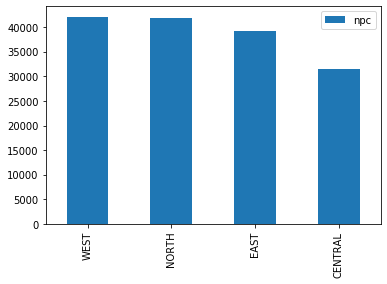

In [4]:
crimes_df.npc.value_counts().plot.bar(legend=True)

crimes_df[crimes_df.npc == "NORTH"].describe()
crimes_df[crimes_df.npc == "CENTRAL"].describe()
crimes_df[crimes_df.npc == "WEST"].describe()
crimes_df[crimes_df.npc == "EAST"].describe()

print( "West crime =", 42101/2075, "crimes per day \nNorth crime =", 41774/2039, "crimes per day \nEast crime =", 39270/2050, "crimes per day \nCentral crime =", 31421/2013, "crimes per day \n")

Here, we are finding the amount of crime per day. So we are arregating the total number of unique crimes per day and then dividing that number under the total number of crimes in that zone. From this, we can see that the central zone has less occurences of crime per day than other zones, which correlates to the graph showing the total amount of crime in that area. This is our crime rate.

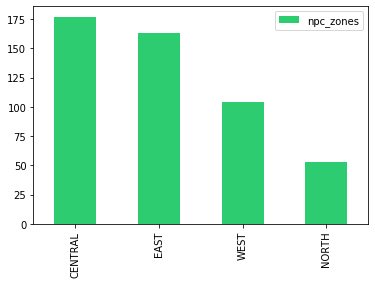

In [5]:
restaurants_df.npc_zones.value_counts().plot.bar(legend=True, color="#2ecc71")

Here, we have the frequency of resturants per zone and the frequency of crime per zone. From the data given above, there is actually an inverse relationship between the two datasets and the zones. We can see that the central zone has the most restaurants and the least amount of crime. Conversely, the North zone has the least amount of restaurants with the second to most amount of crime.
#### Conclusion for Hypothesis 2:
The following information above supports our hypothesis that restaurants tend to congregate around zones with less crime. 

In the next steps, we will compare the average rating and prices of all the restaurants in their corresponding zones. For the further analysis, we will compare the restaurant data in the Central zones with the data in the Northern zones to see if it corresponds to our hypothesis.

Central zone average rating: 3.5282485875706215
East zone average rating: 3.708588957055215
North zone average rating: 3.7547169811320753
West zone average rating: 3.9134615384615383


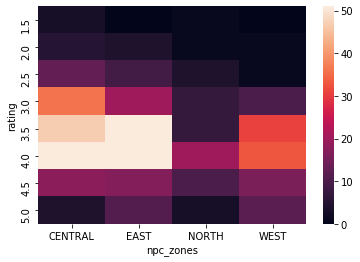

In [6]:
print("Central zone average rating:",restaurants_df.rating[restaurants_df.npc_zones == 'CENTRAL'].mean())
print("East zone average rating:",restaurants_df.rating[restaurants_df.npc_zones == 'EAST'].mean())
print("North zone average rating:",restaurants_df.rating[restaurants_df.npc_zones == 'NORTH'].mean())
print("West zone average rating:",restaurants_df.rating[restaurants_df.npc_zones == 'WEST'].mean())

counts = pd.crosstab(restaurants_df.rating, restaurants_df.npc_zones)
joint = counts / counts.sum().sum()
sns.heatmap(counts)

Central zone average price: 1.4233128834355828
East zone average price: 1.4109589041095891
North zone average price: 1.2291666666666667
West zone average price: 1.3146067415730338


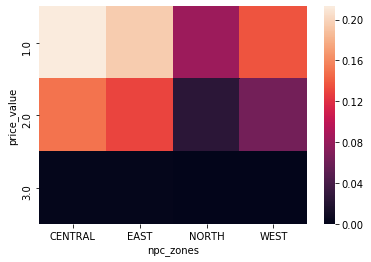

In [7]:
print("Central zone average price:",restaurants_df.price_value[restaurants_df.npc_zones == 'CENTRAL'].mean())
print("East zone average price:",restaurants_df.price_value[restaurants_df.npc_zones == 'EAST'].mean())
print("North zone average price:",restaurants_df.price_value[restaurants_df.npc_zones == 'NORTH'].mean())
print("West zone average price:",restaurants_df.price_value[restaurants_df.npc_zones == 'WEST'].mean())

counts = pd.crosstab(restaurants_df.price_value, restaurants_df.npc_zones)
joint = counts / counts.sum().sum()
sns.heatmap(joint)

We can see that the Central zone has the least average rating with the highest price point and the North zone has the second highest rating to the lowest average price.

#### Conclusion for Hypothesis 1:
With that, we can conclude that an unpopular restaurant with a high price point is less likely to have crime reports in that zone. Inversely, we can also say that a lower priced, popular restaurant is more likely to be in a crime-ridden zone. This goes against our hypothesis that higher rated and higher priced restaurants have lower crime rates.